# 10 Visualizing Spatial Data with PyVista

Spatial Data can be displayed using the PyVista package. This includes point data, line data and rasters. Data will usually be returned as PolyData datasets or Grids so that the user has the full flexibility of plotting the data with PyVista.

<img src="../images/tutorial10_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/10_visualizing_data_with_pyvista/'

In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="10_visualizing_data_with_pyvista.zip", dirpath=file_path)

## Visualizing Contour Lines with PyVista

### Loading Data

The contour lines are loaded as Shapely LineStrings within a GeoDataFrame. 

In [3]:
import pyvista as pv
import geopandas as gpd

contours = gpd.read_file(file_path + 'topo.shp')
contours.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.74088 475.44101, 35.62873 429.24..."
1,None,300,"LINESTRING (645.96500 0.52496, 685.14093 61.86..."
2,None,400,"LINESTRING (490.29223 0.52496, 505.75641 40.73..."
3,None,600,"LINESTRING (911.43347 1068.58451, 908.85610 10..."
4,None,700,"LINESTRING (228.43207 1068.58451, 239.77247 10..."


### Plotting Data

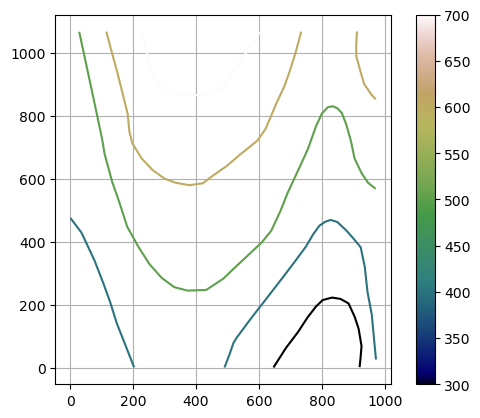

In [4]:
import matplotlib.pyplot as plt

contours.plot(aspect='equal', column='Z', cmap='gist_earth', legend=True)
plt.grid()

### Extracting the vertices of the contour lines for the plotting with PyVista

A PolyData dataset of the contour lines can be created using ``create_lines_3d(..)``.

In [5]:
lines = gg.visualization.create_lines_3d_polydata(gdf=contours)
lines

PolyData,Information
N Cells,7
N Points,121
N Strips,0
X Bounds,"7.409e-01, 9.717e+02"
Y Bounds,"5.250e-01, 1.069e+03"
Z Bounds,"3.000e+02, 7.000e+02"
N Arrays,0


In [6]:
type(lines)

pyvista.core.pointset.PolyData

### Plotting the Lines with PyVista

The result can then be plotted with PyVista by creating a new Plotter and adding the lines as mesh.

C:\Users\ale93371\Anaconda3\envs\gemgis_test\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


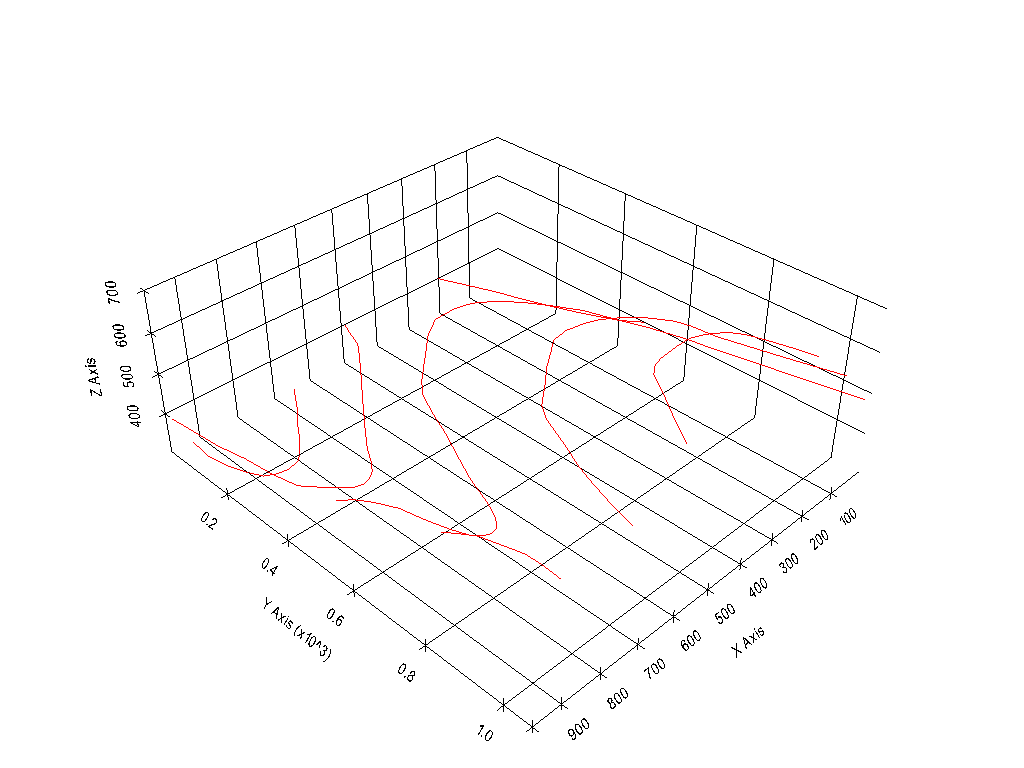

In [7]:
p = pv.Plotter()

p.add_mesh(mesh=lines, color='red')
    
p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Visualizing Points with PyVista

### Load Data

The points are loaded as Shapely Points within a GeoDataFrame.

In [8]:
import pyvista as pv
import geopandas as gpd
import gemgis as gg

points = gpd.read_file(file_path + 'interfaces_points.shp')
points.head()

,id,formation,geometry
0,None,Ton,POINT (19.15013 293.31349)
1,None,Ton,POINT (61.93437 381.45933)
2,None,Ton,POINT (109.35786 480.94557)
3,None,Ton,POINT (157.81230 615.99943)
4,None,Ton,POINT (191.31803 719.09398)


### Loading DEM and extract Z values

In order to plot the points at the correct Z-position, the values have to be extracted from a DEM.

In [9]:
import rasterio

dem = rasterio.open(file_path + 'topo.tif')

points_xyz = gg.vector.extract_xyz(gdf=points, 
                                   dem=dem)

### Plotting Data

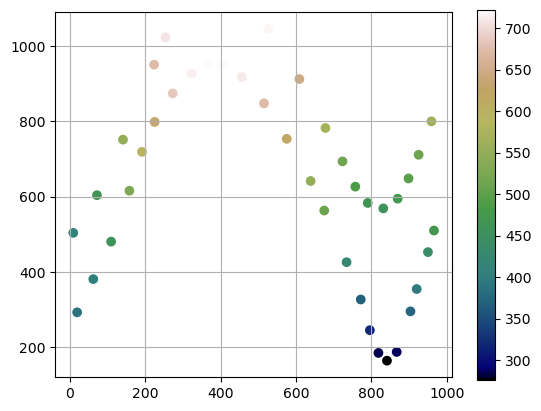

In [10]:
import matplotlib.pyplot as plt

points_xyz.plot(aspect='equal', column='Z', cmap='gist_earth', legend=True)
plt.grid()

### Extracting the vertices of the contour lines for the plotting with PyVista

A PolyData dataset containing the point information can be created using ``create_points_3d(..)``.

In [11]:
points_mesh = gg.visualization.create_points_3d(gdf=points_xyz)
points_mesh

PolyData,Information
N Cells,41
N Points,41
N Strips,0
X Bounds,"8.841e+00, 9.661e+02"
Y Bounds,"1.650e+02, 1.045e+03"
Z Bounds,"2.769e+02, 7.220e+02"
N Arrays,0


In [12]:
type(points_mesh)

pyvista.core.pointset.PolyData

### Plotting the Points with PyVista

The result can then be plotted with PyVista by creating a new Plotter and adding the points as mesh.

C:\Users\ale93371\Anaconda3\envs\gemgis_test\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


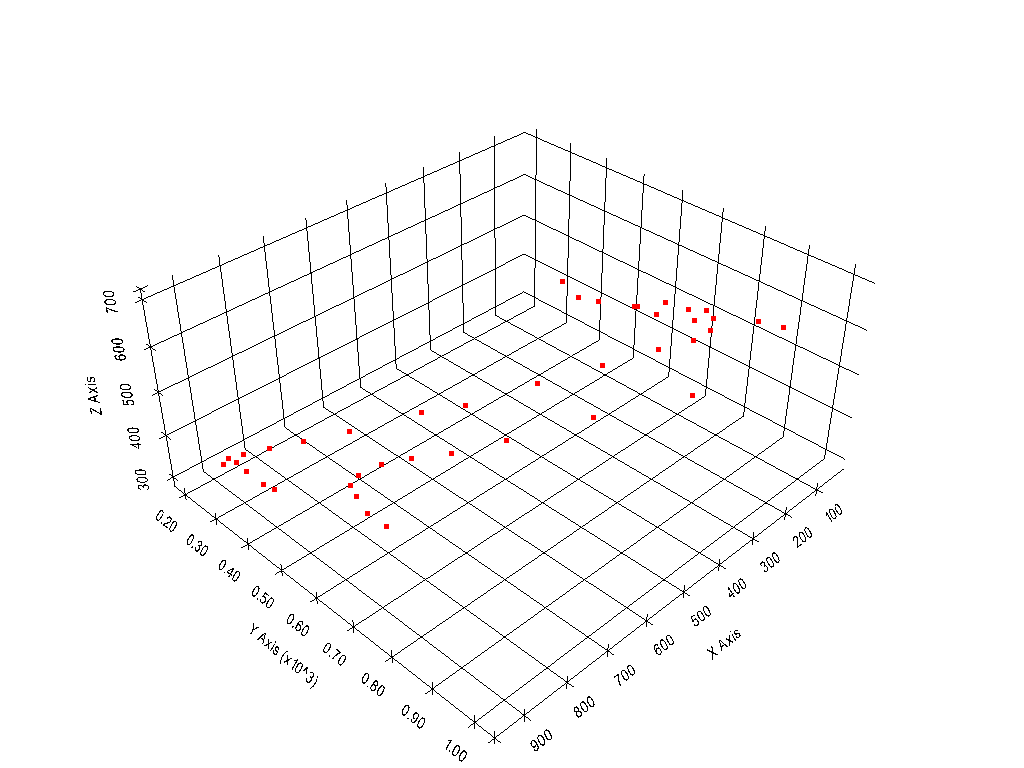

In [13]:
p = pv.Plotter()

p.add_mesh(mesh=points_mesh, color='red')

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Visualizing the DEM with PyVista

### Loading Data

The DEM is loaded as Rasterio object using rasterio.

In [14]:
import rasterio
import gemgis as gg
import pyvista as pv 
import numpy as np

dem = rasterio.open(file_path + 'topo.tif')

dem.read(1)

array([[499.90110024, 499.86421238, 499.82858152, ..., 625.37307284,
        625.78164892, 626.18920124],
       [499.53566482, 499.49887905, 499.4633306 , ..., 625.17315916,
        625.58165735, 625.98912699],
       [499.18752484, 499.15158818, 499.11692808, ..., 624.97739453,
        625.38574125, 625.79305697],
       ...,
       [411.5023835 , 411.37335931, 411.24503355, ..., 384.8252337 ,
        386.21293421, 387.56684012],
       [411.66101945, 411.5316941 , 411.40306465, ..., 384.4299191 ,
        385.80964238, 387.15718098],
       [411.82014581, 411.69052091, 411.56158939, ..., 384.04962954,
        385.42140506, 386.76248969]])

### Plotting the Data

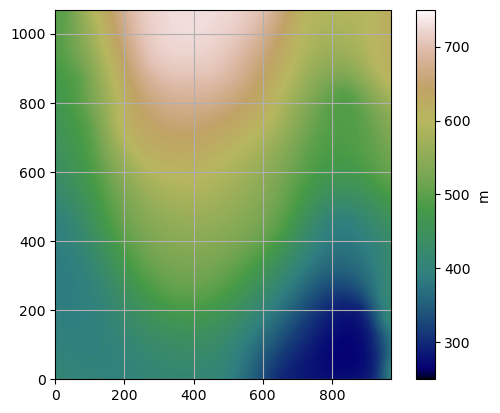

In [15]:
import matplotlib.pyplot as plt

im =plt.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
cbar = plt.colorbar(im)
cbar.set_label('m')
plt.grid()

### Converting the Rasterio object or NumPy Array into a Structured Grid

A StructuredGrid containing the DEM information can be created using ``create_dem_3d(..)``.

In [16]:
grid = gg.visualization.create_dem_3d(dem=np.flipud(dem.read(1)), extent=[0,972,0,1069])

grid

C:\Users\ale93371\Anaconda3\envs\gemgis_test\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


StructuredGrid (0x1e871337640)
  N Cells:	1037028
  N Points:	1039068
  X Bounds:	0.000e+00, 9.710e+02
  Y Bounds:	0.000e+00, 1.068e+03
  Z Bounds:	2.650e+02, 7.300e+02
  Dimensions:	1069, 972, 1
  N Arrays:	1

In [17]:
type(grid)

pyvista.core.pointset.StructuredGrid

### Plotting the Structured Grid with PyVista

The elevation information of the DEM, also called ``scalars`` are stored in the NumPy array ``grid["Elevation"]``. The grid can be plotted by creating a new PyVista Plotter and adding the grid as mesh to the plotter.

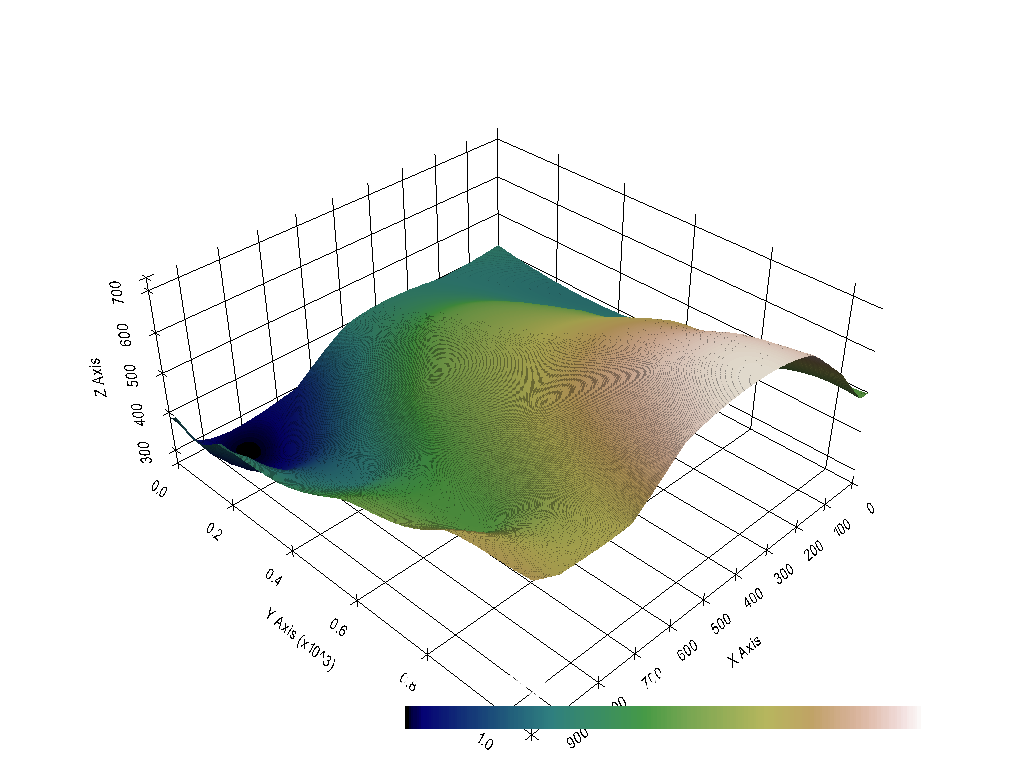

In [18]:
p = pv.Plotter()

p.add_mesh(mesh=grid, scalars=grid["Elevation"], cmap='gist_earth')
    
p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Combining everything

All datasets can also be plotted in the same plot.

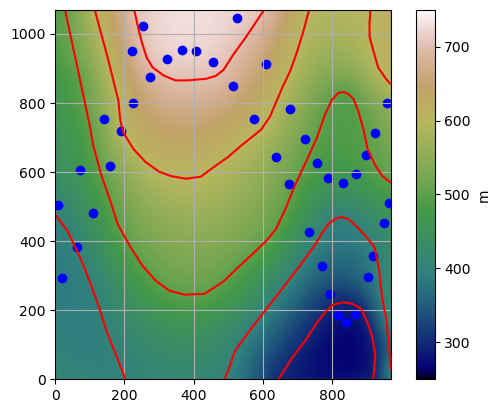

In [19]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1,1)
points_xyz.plot(ax=ax, aspect='equal', color='blue')
contours.plot(ax=ax,aspect='equal', color='red')
im =plt.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
cbar = plt.colorbar(im)
cbar.set_label('m')

plt.grid()

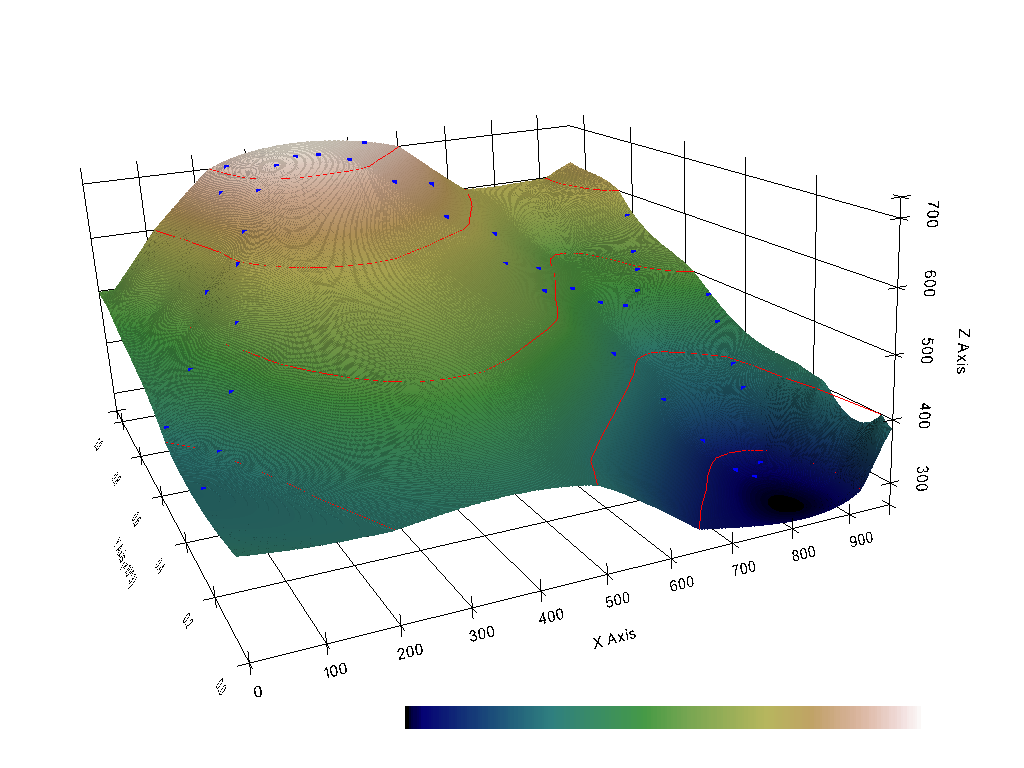

In [20]:
p = pv.Plotter()

p.add_mesh(mesh=lines, color='red')
    
p.add_mesh(mesh=points_mesh, color='blue')

p.add_mesh(mesh=grid, scalars=grid["Elevation"], cmap='gist_earth')

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]

p.set_background('white')
p.show_grid(color='black')
p.show()